Homework 01: Model Building and Model Selection/Fitting
<br>
<br>
MACSS 18
<br>
Di Tong
<br>
<br>
See the PDF file for solutions to the model buiding part and the first problem of model selection/fitting part.

Selecting and fitting a model

Problem 2： Bias-variance decomposition 

In [329]:
# Import the libraries
import numpy as np
import matplotlib.pyplot as plt

a. Generate a graph of typical (squared) bias, variance, 
training error, test error, and Bayes (irreducible) error curves, 
on a single plot, as we go from less flexible statistical learning 
methods towards more flexible approaches. The x-axis should 
represent the amount of flexibility in the method, and the y-axis 
should represent the values for each curve. 

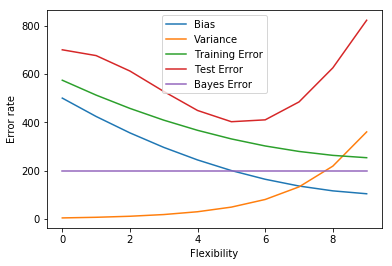

In [330]:
# Set the range of x
x = np.arange(10)

# The function for Bias
y_bias = (2 * x - 20)**2 + 100
# Plot the Bias curve
plt.plot(x, y_bias)

# The function for variance
y_var = np.exp(x/2)*4
# Plot the variance curve
plt.plot(x, y_var)

# The function for training error
y_train = y_bias = (1.8 * x - 18)**2 + 250
# Plot the training error
plt.plot(x, y_train)

# The function for test error
y_test = x**3/2 + 200 * np.cos(x/2) + 500
# Plot the test error curve
plt.plot(x, y_test)

# The function for Bayes error
y_bayes = 200 + x * 0 
# Plot the irreducible error curve
plt.plot(x, y_bayes)

# Add label and legend
plt.xlabel('Flexibility')
plt.ylabel('Error rate')
plt.legend(['Bias', 'Variance', 'Training Error', 'Test Error', 'Bayes Error'])

b. Explain why each of the five curves has the shape displayed in part (a). 
<br>
<br>
Bias: when flexibility increases, the shape of the fit will not be assumed and hence the potential error resultiong from using much simpler model to approximate complicated real-world problem will be reduced.
<br>
Variance: the variance increases with higher flexibity, because a more flexible method follows the specific training data points more closely and hence changing any one of the points will cause the estimate to change considerably.
<br>
Training error: when the flexibility increases, the estimate f more closely follows the training data points and therefore the training error decreases.
<br>
Test error: the test error changes in a U-shape as the flexibility changes as a result of the interaction between variance and bias.
<br>
Bayes error: the Bayes error remains a constant because it represents the lowest achievable test error among all possible methods.

<br>
Problem 3

In [331]:
# Setting up random number generator seed
np.random.seed(524)

In [332]:
# Simulate a dataset of N = 200 with X1,X2 
# where X1,X2 are random uniform variables between [−1,1]
x1 = np.random.uniform(low=-1.0, high=1.0, size=200)
x2 = np.random.uniform(low=-1.0, high=1.0, size=200)

In [333]:
# Use a Function to calculate Y and the probability of 
# success bounded between [0,1] and return an array 
# classifying each point into a success or failure
def point_classification(x1, x2):
    # Generate the error term ε
    epsilon = np.random.normal(loc=0.0, scale=0.5, size=len(x1))
    # Calculate Y
    y = x1 + x1**2 + x2 + x2**2 + epsilon
    # Calculate the probability of success bounded between [0,1]
    prob = np.exp(y) / (1 + np.exp(y))
    # Determine if each point is a success or failure
    outcome = np.copy(prob)
    outcome[prob > 0.5] = 1
    outcome[prob <= 0.5] = 0
    
    return outcome

Text(0,0.5,'X2')

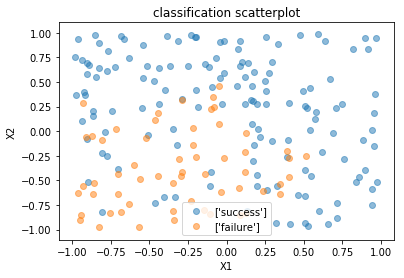

In [334]:
# Classify each point into a success or failure
outcome = point_classification(x1, x2)

# Plot each of the data points on a graph and use color to indicate 
# if the observation was a success or a failure
plt.scatter(x1[outcome == 1], x2[outcome == 1], alpha=0.5, label = ['success'])
plt.scatter(x1[outcome == 0], x2[outcome == 0], alpha=0.5, label = ['failure'])
plt.legend()

# Give the plot title and axis labels
plt.title('classification scatterplot')
plt.xlabel('X1')
plt.ylabel('X2')

Text(0,0.5,'X2')

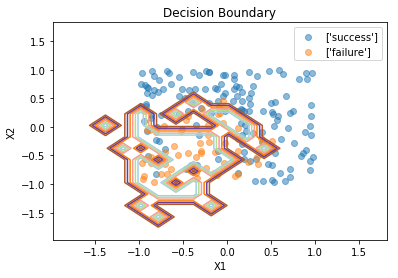

In [336]:
h = 0.2  # Step size in the mesh
# Create a mesh to plot in
x_min, x_max = x1.min() - 1, x1.max() + 1
y_min, y_max = x2.min() - 1, x2.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Plot the decision boundary through assigning a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max]
classification = point_classification(xx.ravel(), yy.ravel())
classification = classification.reshape(xx.shape)
plt.scatter(x1[outcome == 1], x2[outcome == 1], alpha=0.5, label = ['success'])
plt.scatter(x1[outcome == 0], x2[outcome == 0], alpha=0.5, label = ['failure'])
plt.legend()
plt.contour(xx, yy, classification, cmap=plt.cm.Paired)

# Give the plot title and axis labels
plt.title('Decision Boundary')
plt.xlabel('X1')
plt.ylabel('X2')